<a href="https://colab.research.google.com/github/pradeep-016/Housing_Data_Predicting_Using_ANN/blob/main/Housing_Data_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid =train_test_split(X_train_full,y_train_full,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
X_train.shape

(11610, 8)

In [11]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae']
              )

In [14]:
model_history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 5s 4ms/step - loss: 0.7127 - mae: 0.5936 - val_loss: 2.7378 - val_mae: 0.5054
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4558 - mae: 0.4765 - val_loss: 7.1986 - val_mae: 0.5056
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4619 - mae: 0.4576 - val_loss: 1.3684 - val_mae: 0.4515
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3988 - mae: 0.4490 - val_loss: 3.2737 - val_mae: 0.4781
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3957 - mae: 0.4422 - val_loss: 4.8989 - val_mae: 0.4821
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4101 - mae: 0.4444 - val_loss: 0.4951 - val_mae: 0.4304
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3703 - mae: 0.4340 - val_loss: 0.3762 - val_mae: 0.4236
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.

In [15]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3329 - mae: 0.4098


In [16]:
model_history.history

{'loss': [0.7127171754837036,
  0.45578423142433167,
  0.46189644932746887,
  0.39880654215812683,
  0.3957102298736572,
  0.41007480025291443,
  0.37026098370552063,
  0.36162251234054565,
  0.356672465801239,
  0.35300523042678833,
  0.35137060284614563,
  0.34926652908325195,
  0.3456050753593445,
  0.3423939347267151,
  0.34080520272254944,
  0.3384280800819397,
  0.3356397747993469,
  0.3336837887763977,
  0.3329974114894867,
  0.3308717906475067],
 'mae': [0.5935630798339844,
  0.47654256224632263,
  0.45756956934928894,
  0.44901150465011597,
  0.44217589497566223,
  0.4444139897823334,
  0.4340258836746216,
  0.42880186438560486,
  0.423659086227417,
  0.42181628942489624,
  0.41941511631011963,
  0.4175298511981964,
  0.4158364534378052,
  0.4126679003238678,
  0.4114426076412201,
  0.4100736081600189,
  0.408430814743042,
  0.4066610336303711,
  0.40497711300849915,
  0.4028804302215576],
 'val_loss': [2.737757682800293,
  7.1985883712768555,
  1.3684093952178955,
  3.2736904

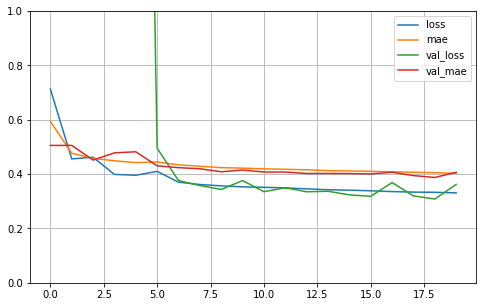

In [17]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
X_new=X_test[:3]

In [19]:
y_pred=model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 73ms/step
[[0.7101414]
 [1.726496 ]
 [4.496614 ]]
[0.477   0.458   5.00001]
